In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Import the Data. For this analysis, I will be using the Titanic Training data. I'll be validating the model 
# using both a validation set (obtained from the training data) and the testing data.

training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0 
test['survived'] = np.nan # Locate surviving individuals by stipulating nan values
all_data = pd.concat([training, test]) # Concat Training and Test datasets. 

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'survived'],
      dtype='object')

Project Planning

Below is a rough guide to the plan for this project
1. Exploratory Data Analysis
   Using .info(), .describe() as well as a variety of histograms, boxplots and other graphs. We can perform just some initial exploratory data analysis to provide a general overview of the data we have obtained. This allows us also to look out for missing data, as well as the correlative strength of our variables with one another.
   
2. Feature Engineering

3. Model Baseline

4. Model Comparison


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe() # This gives us an understanding of the central tendencies within the data.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
# Separate numeric columns
training.describe().columns

Titanic_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
Titanic_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [6]:
Titanic_cat

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S
...,...,...,...,...,...,...
886,0,2,male,211536,NaN,S
887,1,1,female,112053,B42,S
888,0,3,female,W./C. 6607,NaN,S
889,1,1,male,111369,C148,C


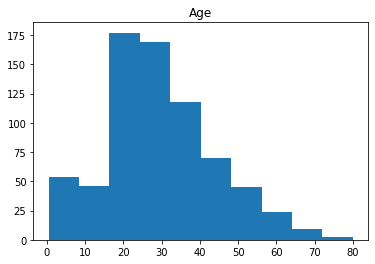

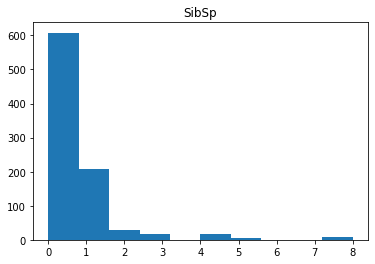

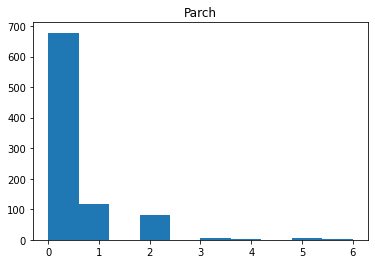

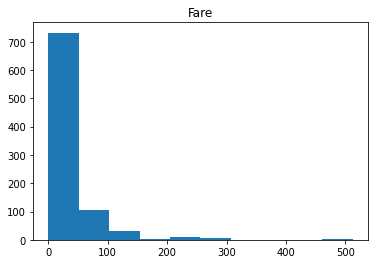

In [7]:
#Import matplotlib
import matplotlib.pyplot as plt

# Use Histograms to show the distribution of all numeric variables
for i in Titanic_num.columns:
    plt.hist(Titanic_num[i])
    plt.title(i)
    plt.show()

Besides Age , which already looks fairly normaly distributed, all our numeric variables are right skewed. Given this, it means it might
work better if we take those variables which are right skewed and consider normalising them.

<AxesSubplot:>

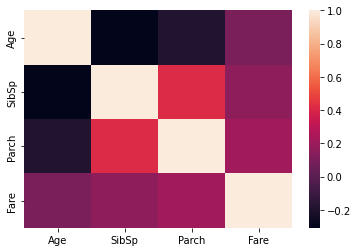

In [8]:
# Import Seaborn
import seaborn as sns

Titanic_num.corr()
sns.heatmap(Titanic_num.corr())

In [9]:
# Compare Survival rates across the different numerical variables
pd.pivot_table(training, index = 'Survived', values = training.columns)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,train_test
Survived,,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734,1
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684,1


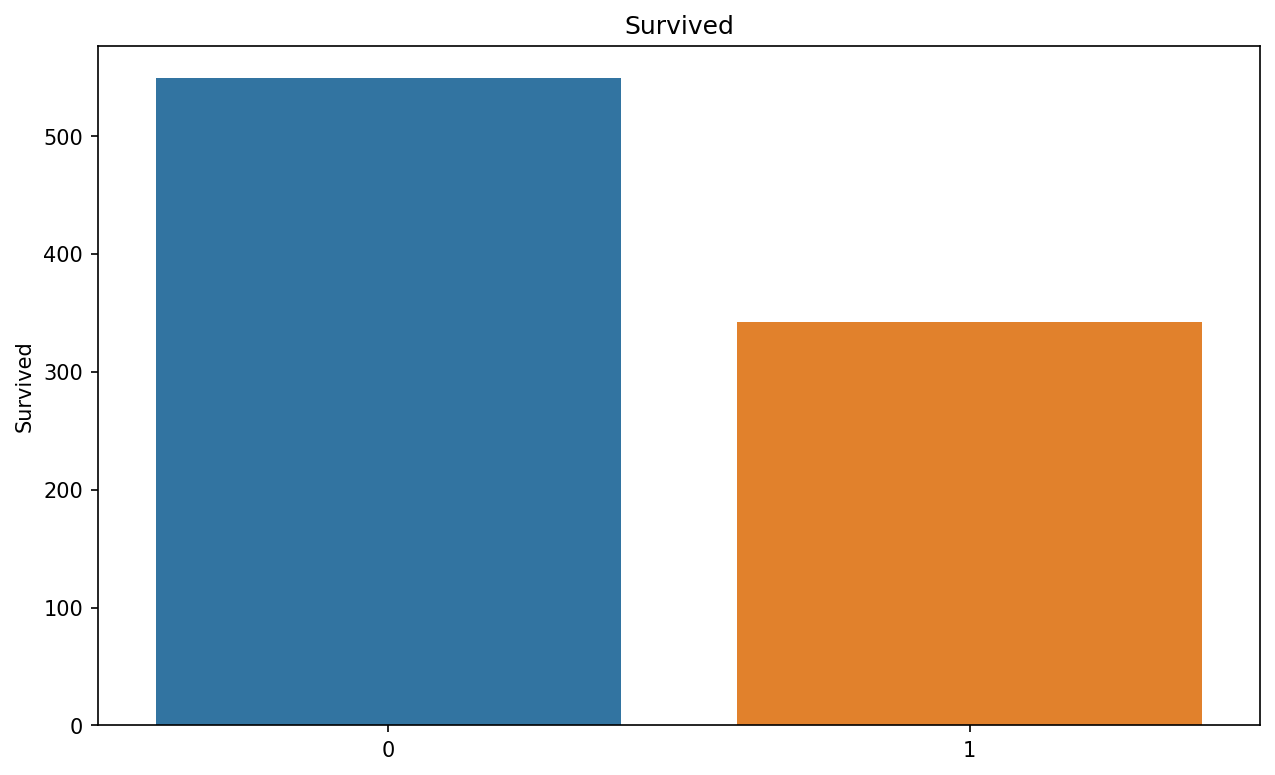

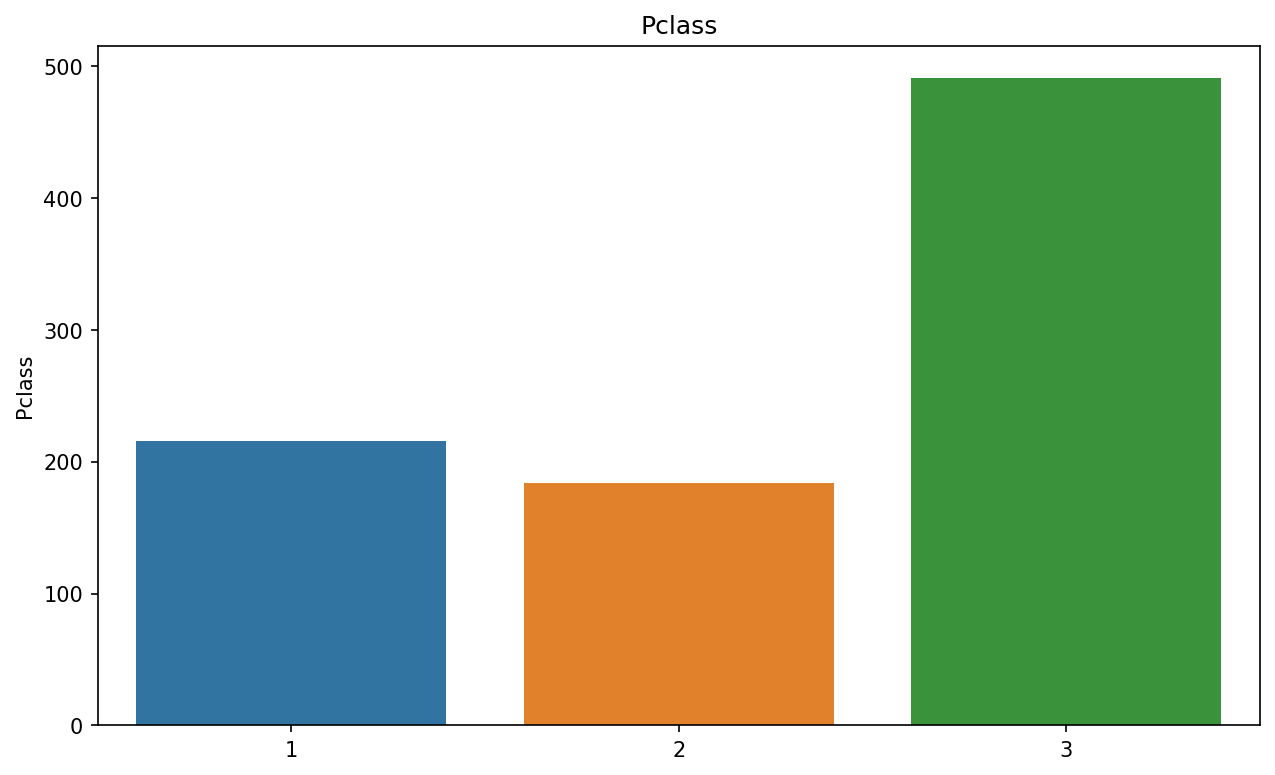

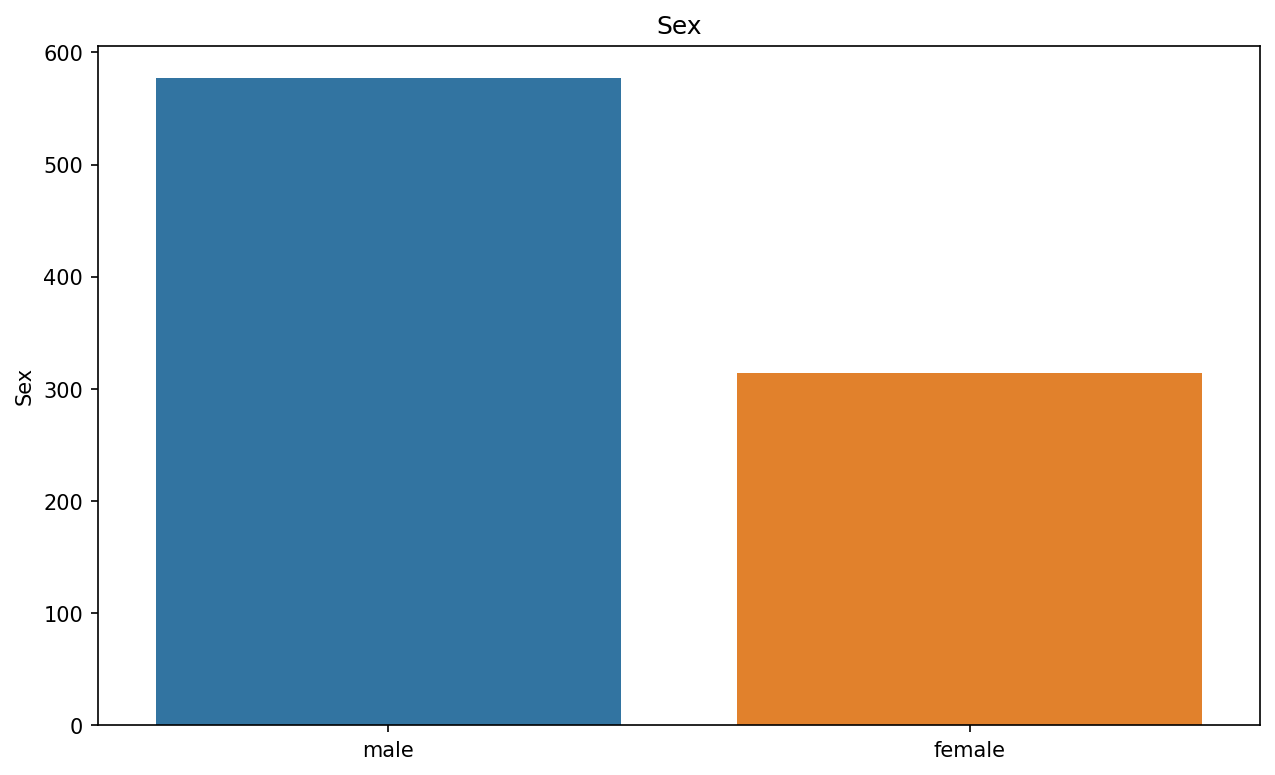

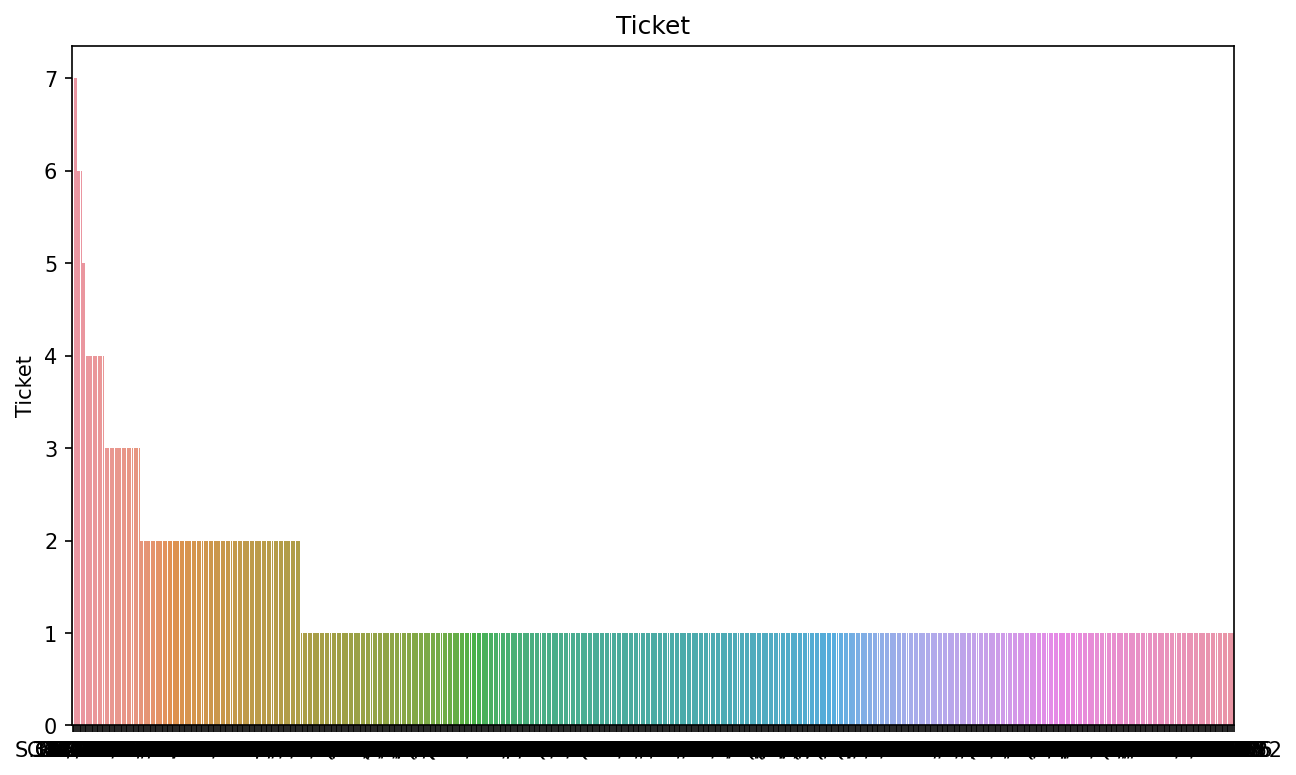

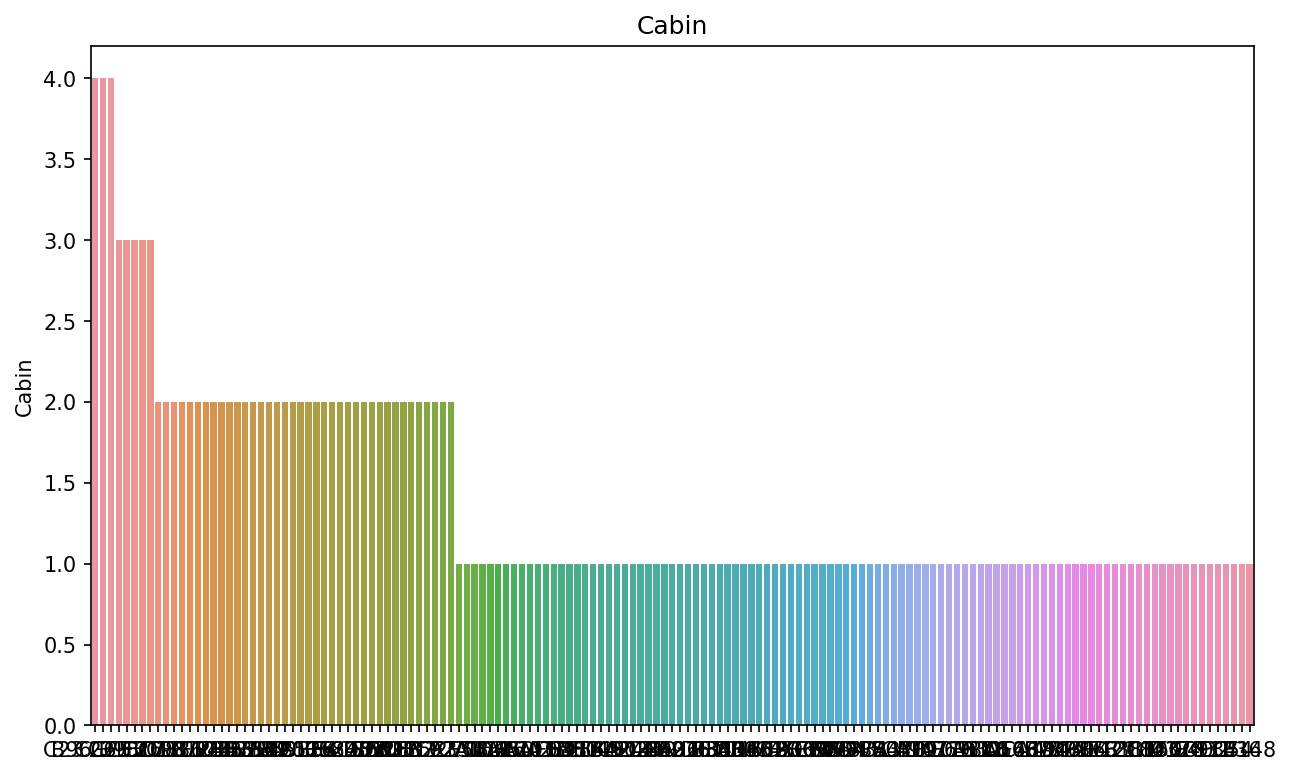

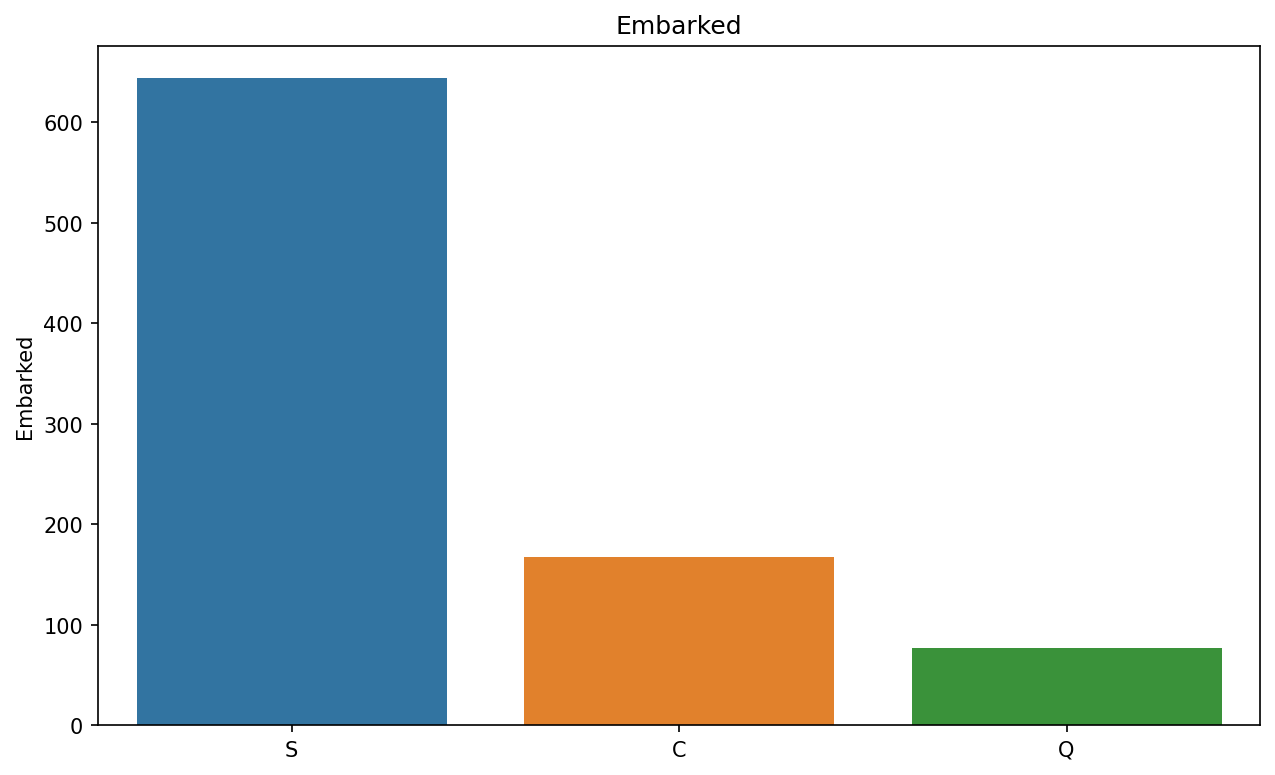

In [10]:
# Import Seaborn
import seaborn as sns

for i in Titanic_cat.columns:
    plt.figure(figsize=(10,6), dpi=150)
    sns.barplot(data=training, x=Titanic_cat[i].value_counts().index, y=Titanic_cat[i].value_counts())
    plt.title(i)
    plt.show()

In [11]:
# Compare Survival of each of the categorical variables
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print()
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# What types of Feature Engineering Can we do
1) Simply cabin data. Does a cabin letter (cabin_adv) or purchase of tickets across multiple cabins (cabin_multiple) impact survival rate? 
2) Do different ticket types impact on survival rates?

In [12]:
Titanic_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split()))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
pd.pivot_table(training, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
# Compare survival rate by Cabin type
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0]) # Create a categorical variable based on cabin letter (n = null)

print(training.cabin_adv.value_counts())
pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0
